In [1]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

no display found. Using non-interactive Agg backend


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [3]:
df = pd.read_csv("ToyotaCorolla.csv")
df.head(2)

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0


In [5]:
df.columns

Index(['model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar'],
      dtype='object')

In [8]:
# Part of data preparation and data cleaning
excludeColumns = ('price','id', 'model', 'fuel_type', 'color')
predictor = []
for s in df.columns:
    if s not in excludeColumns:
        predictor.append(s)

outcome = 'price'

In [9]:
print(predictor)

['age_08_04', 'mfg_month', 'mfg_year', 'km', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee', 'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2', 'airco', 'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock', 'powered_windows', 'power_steering', 'radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette', 'parking_assistant', 'tow_bar']


In [13]:
# Partition Data

x = df[predictor]
y = df[outcome]

train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size = 0.4, random_state = 1) 

In [14]:
# Train Linear Regression model

reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [15]:
# Evaluate Performance training

regressionSummary?


Signature: regressionSummary(y_true: Any, y_pred: Any) -> None
Docstring:
print regression performance metrics

Input:
    y_true: actual values
    y_pred: predicted values
File:      /Applications/anaconda3/lib/python3.12/site-packages/dmba/metric.py
Type:      function

In [16]:
# Evaluate Performance training
regressionSummary(train_y, reg.predict(train_x))
regressionSummary(valid_y, reg.predict(valid_x))



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1121.0606
            Mean Absolute Error (MAE) : 811.6770
          Mean Percentage Error (MPE) : -0.8630
Mean Absolute Percentage Error (MAPE) : 8.0054

Regression statistics

                      Mean Error (ME) : 97.1891
       Root Mean Squared Error (RMSE) : 1382.0352
            Mean Absolute Error (MAE) : 880.1396
          Mean Percentage Error (MPE) : 0.0138
Mean Absolute Percentage Error (MAPE) : 8.8744


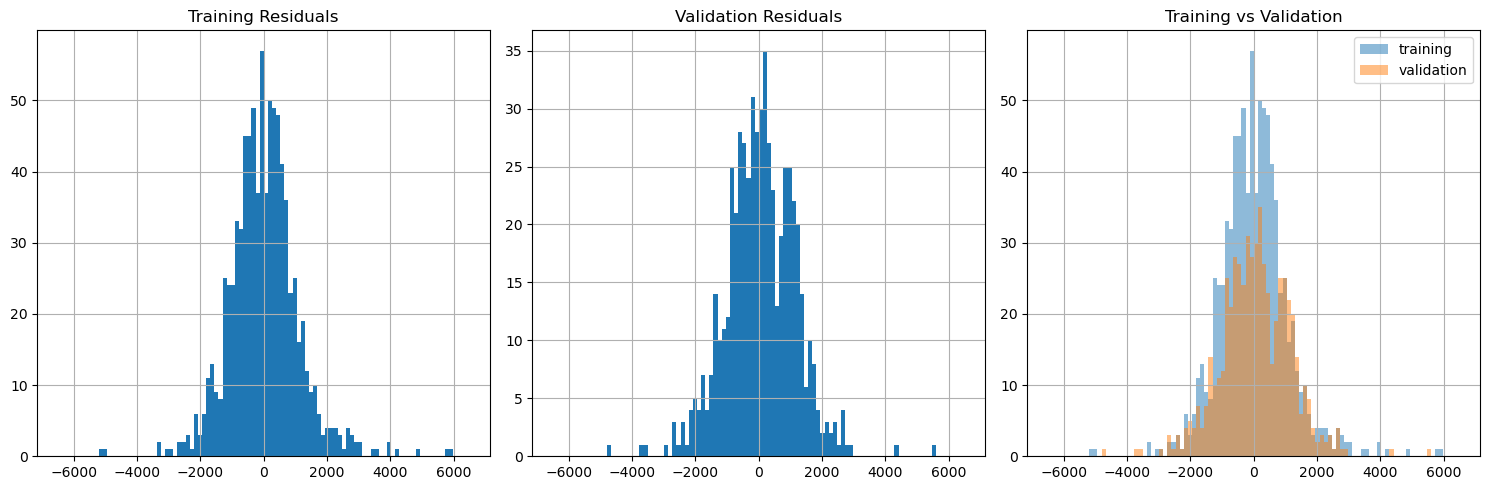

In [24]:
'''
These graphs show the distribution of prediction errors (residuals) from the machine learning model, where:

Residuals = Actual values (y) - Predicted values

A positive residual means the model underpredicted
A negative residual means the model overpredicted

'''
pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_x),
    'data set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - reg.predict(valid_x),
    'data set': 'validation'
})
boxdata_df = pd.concat([pred_error_train, pred_error_valid], ignore_index=True)

# Create just ONE row of three plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

common = {
    'bins': 100,
    'range': [-6500, 6500]
}

# First histogram - Training data
pred_error_train['residual'].hist(ax=axes[0], **common)
axes[0].set_title('Training Residuals')

# Second histogram - Validation data
pred_error_valid['residual'].hist(ax=axes[1], **common)
axes[1].set_title('Validation Residuals')

# Third histogram - Overlaid comparison
for name, group in boxdata_df.groupby('data set'):
    group['residual'].hist(ax=axes[2], alpha=0.5, label=name, **common)
axes[2].set_title('Training vs Validation')
axes[2].legend()

plt.tight_layout()
plt.show()

# When we use **common in the histogram calls (like hist(ax=axes[0], **common)), it's the same as writing:
# hist(ax=axes[0], bins=100, range=[-6500, 6500])

In [ ]:
# This is really a great example to understand the fact as below if we see valid_x and train_x produces the same
# Commulative and Decile-Lift graphs it means that our model has performed very similar to the data it can see (valid_x) and 
# on the data that it cannot see (train_x)

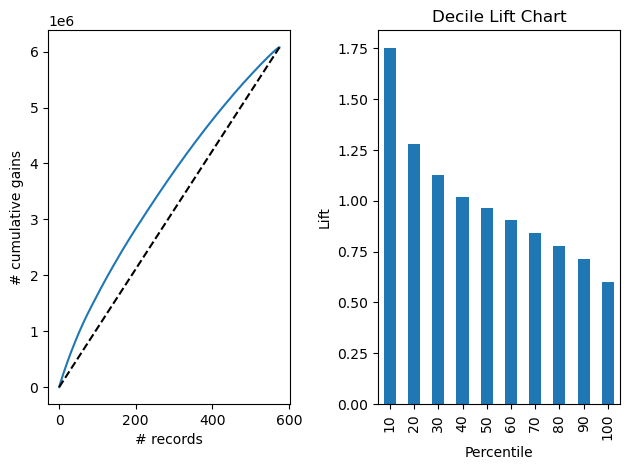

In [30]:
# This is the decile and Commulative gains chart based on the validation based on x
pred_v = pd.Series(reg.predict(valid_x))
pred_v = pred_v.sort_values (ascending = False)

fig, axes = plt.subplots(nrows = 1, ncols = 2)
ax = gainsChart(pred_v, ax = axes[0])
plt.ylabel('Commulative Price')
plt.title('Commulative Gaind chart')


ax = liftChart(pred_v, ax = axes[1], labelBars= False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()


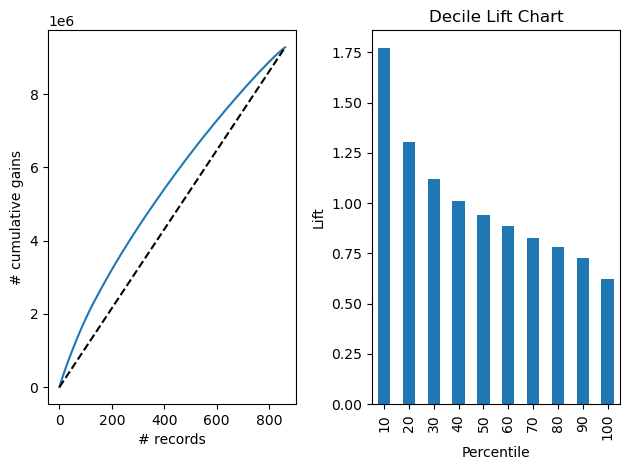

In [33]:
# This is the decile and Commulative gains chart based on the validation based on y
pred_v = pd.Series(reg.predict(train_x))
pred_v = pred_v.sort_values(ascending = False)

fig, axes = plt.subplots(nrows = 1, ncols = 2)
ax = gainsChart(pred_v, ax = axes[0])
plt.ylabel('Commulative Price')
plt.title('Commulative Gaind chart')


ax = liftChart(pred_v, ax = axes[1], labelBars= False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()


In [36]:
print("Validation Dataset Size :", valid_x.shape)
print("Training Dataset Size :", train_x.shape)

Validation Dataset Size : (575, 34)
Training Dataset Size : (861, 34)


In [28]:
cm = confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If